<a href="https://colab.research.google.com/github/fxrdhan/Machine-Learning-Project/blob/main/Seoul_Bike_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Seoul Bike Sharing Demand Prediction**

**Tugas Besar AI - Linear Regression**

Dataset: [Seoul Bike Sharing Demand](https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand)

Objective: Memprediksi jumlah sepeda yang disewa berdasarkan kondisi cuaca dan waktu

---
## Data Acquisition

In [ ]:
!pip install ucimlrepo -q
from ucimlrepo import fetch_ucirepo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

pd.set_option('display.max_columns', None)

In [ ]:
dataset = fetch_ucirepo(id=560)
df = pd.concat([dataset.data.features, dataset.data.targets], axis=1)
df

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


---
## Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Solar Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.3+ 

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility,8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature,8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation,8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall,8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall,8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [ ]:
df.isnull().sum().to_frame('missing_count')

,missing_count
Date,0
Rented Bike Count,0
Hour,0
Temperature,0
Humidity,0
Wind speed,0
Visibility,0
Dew point temperature,0
Solar Radiation,0
Rainfall,0


**Info:**
- Dataset memiliki 8760 entries dan 14 kolom tanpa missing values
- 4 kolom kategorikal (Date, Seasons, Holiday, Functioning Day) dan 10 kolom numerik
- Kolom `Date` tidak relevan untuk model prediksi yang nanti akan dihapus

In [ ]:
# Cek duplikat
duplicates = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()

Jumlah data duplikat: 0


Dataset tidak memiliki data duplikat sehingga tidak perlu dilakukan penghapusan data duplikat.

---
## Exploratory Data Analysis (EDA)

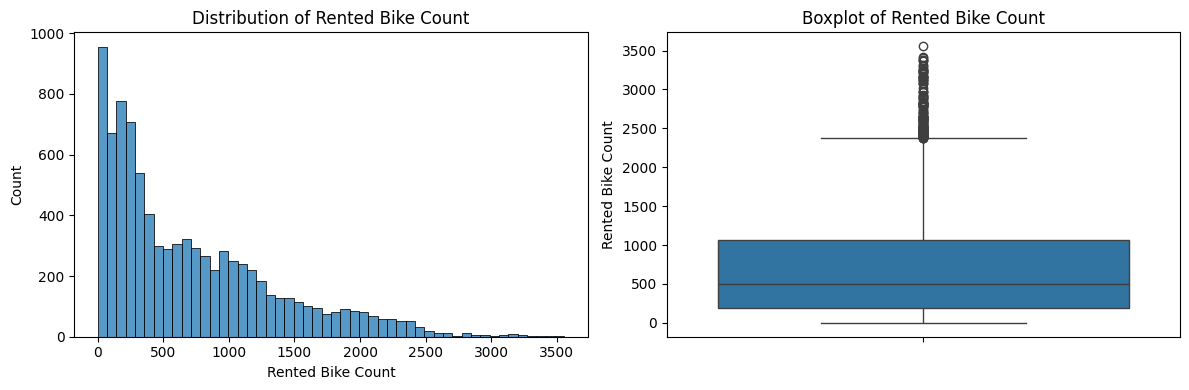

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['Rented Bike Count'], bins=50, ax=axes[0])
axes[0].set_title('Distribution of Rented Bike Count')

sns.boxplot(y=df['Rented Bike Count'], ax=axes[1])
axes[1].set_title('Boxplot of Rented Bike Count')
plt.tight_layout()
plt.show()

In [ ]:
# Hitung statistik
Q1 = df['Rented Bike Count'].quantile(0.25)
Q3 = df['Rented Bike Count'].quantile(0.75)
IQR = Q3 - Q1
median = df['Rented Bike Count'].median()
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
print(f"Q1 (25%): {Q1}")
print(f"Q3 (75%): {Q3}")
print(f"IQR: {IQR}")
print(f"Batas bawah outlier: {lower_bound}")
print(f"Batas atas outlier: {upper_bound}")

outliers = df[(df['Rented Bike Count'] < lower_bound) | (df['Rented Bike Count'] > upper_bound)]
print(f"\nJumlah outlier: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

Q1 (25%): 191.0
Q3 (75%): 1065.25
IQR: 874.25
Batas bawah outlier: -1120.375
Batas atas outlier: 2376.625

Jumlah outlier: 158 (1.80%)


**Outliers pada Rented Bike Count**

Menggunakan metode IQR, batas atas outlier ditemukan pada nilai ~2376. Data di atas batas ini dapat mengganggu performa model. Sebagai penanganan, nilai `Rented Bike Count` akan dibatasi maksimal sesuai upper bound untuk mengurangi pengaruh outliers.

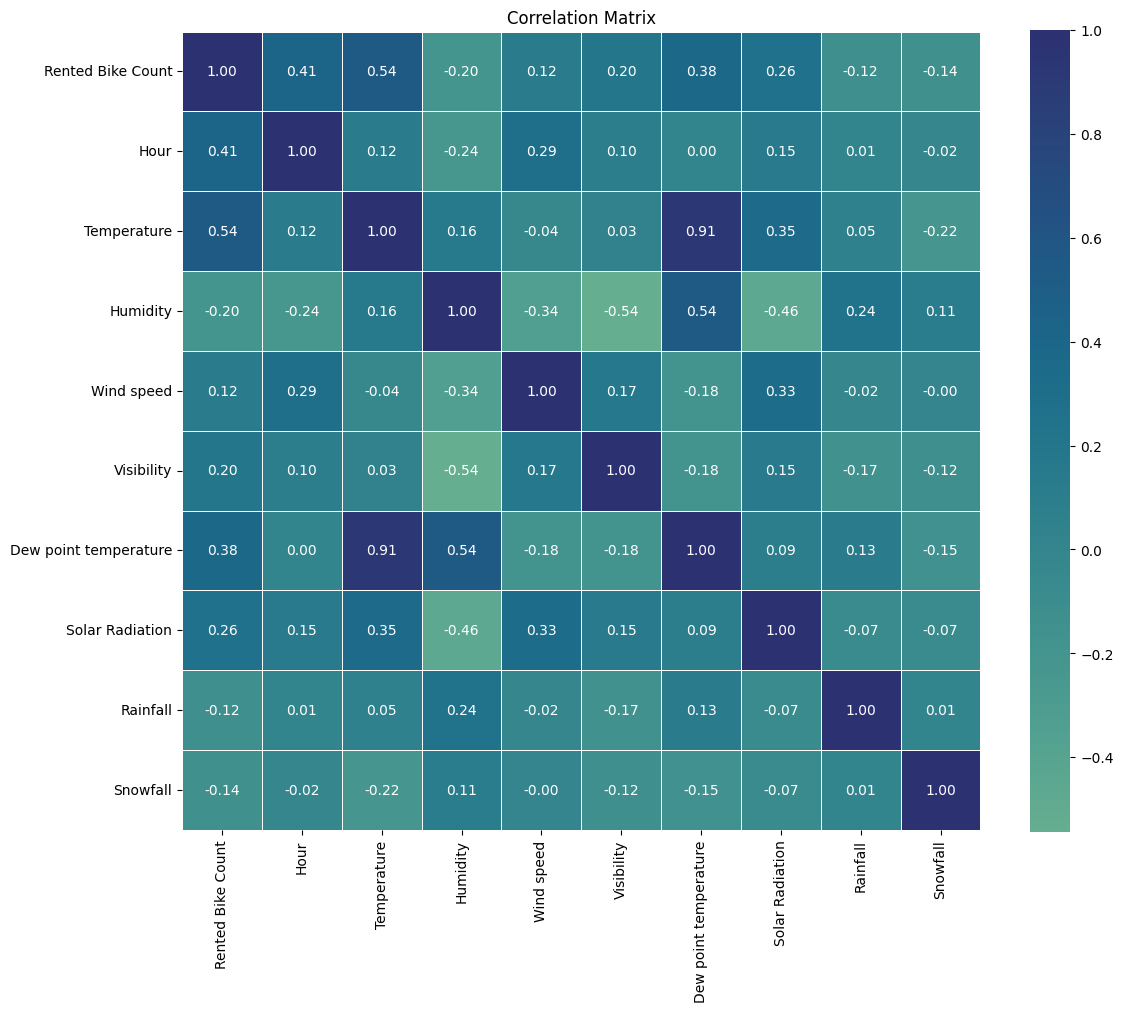

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='crest', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

**Temperature & Dew Point memiliki korelasi tinggi (0.91)**

Korelasi 0.91 menunjukkan kedua variabel memberikan informasi hampir identik. Menyimpan keduanya akan menyebabkan multikolinearitas yang dapat mengganggu performa model. Cukup pertahankan `Temperature` karena lebih fundamental, sementara `Dew Point` dapat dihapus.

In [ ]:
corr_matrix['Rented Bike Count'].sort_values(ascending=False).to_frame('correlation')

,correlation
Rented Bike Count,1.000000
Temperature,0.538558
Hour,0.410257
Dew point temperature,0.379788
Solar Radiation,0.261837
Visibility,0.199280
Wind speed,0.121108
Rainfall,-0.123074
Snowfall,-0.141804
Humidity,-0.199780


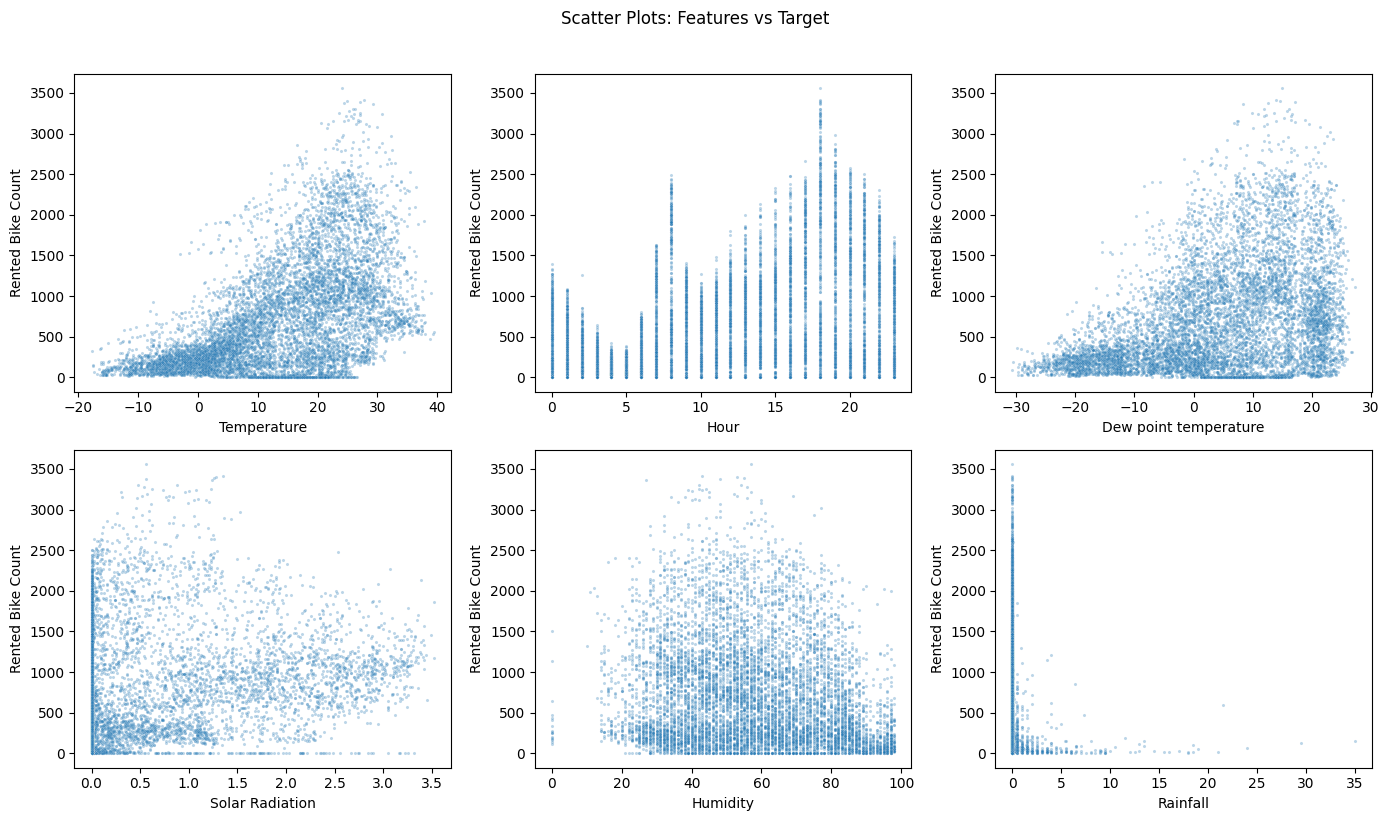

In [ ]:
top_features = ['Temperature', 'Hour', 'Dew point temperature',
                'Solar Radiation', 'Humidity', 'Rainfall']

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
for idx, feat in enumerate(top_features):
    ax = axes[idx // 3, idx % 3]
    sns.scatterplot(data=df, x=feat, y='Rented Bike Count',
                    alpha=0.3, s=5, ax=ax)
plt.suptitle('Scatter Plots: Features vs Target', y=1.02)
plt.tight_layout()
plt.show()

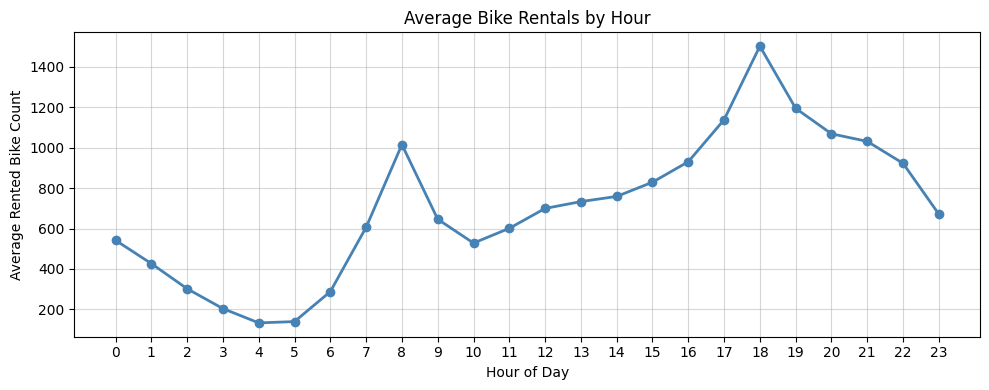

In [ ]:
hourly_avg = df.groupby('Hour')['Rented Bike Count'].mean().reset_index()

plt.figure(figsize=(10, 4))
plt.plot(hourly_avg['Hour'], hourly_avg['Rented Bike Count'],
         marker='o', linewidth=2, markersize=6, color='steelblue')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rented Bike Count')
plt.title('Average Bike Rentals by Hour')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

**Hubungan Fitur dengan Target**

- `Temperature` memiliki korelasi positif terkuat (0.54) dengan Rented Bike Count
- `Humidity` berkorelasi negatif (-0.20) yang berarti kelembaban tinggi menurunkan penyewaan
- `Hour` menunjukkan pola non-linear dimana penyewaan tinggi ada di jam 8 dan 18 (jam kerja)

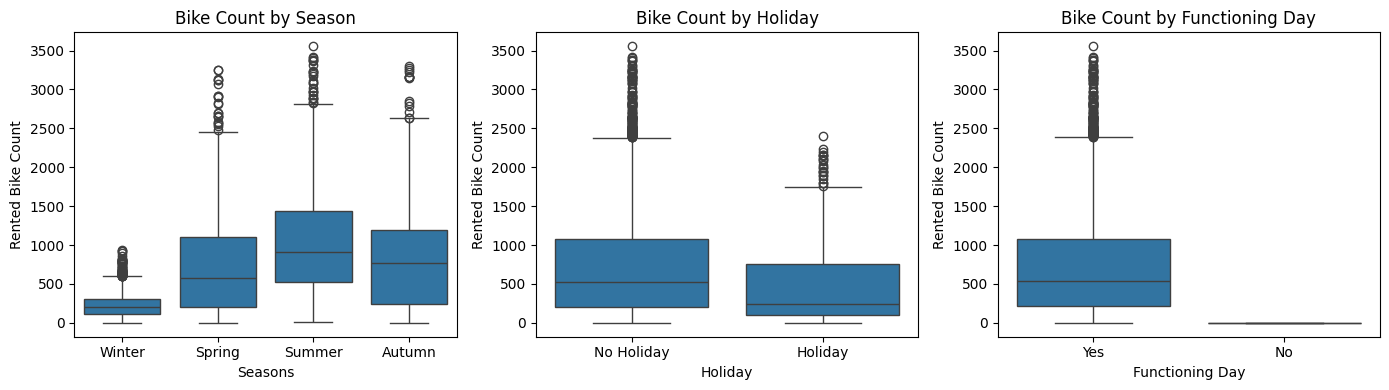

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

sns.boxplot(data=df, x='Seasons', y='Rented Bike Count', ax=axes[0])
axes[0].set_title('Bike Count by Season')

sns.boxplot(data=df, x='Holiday', y='Rented Bike Count', ax=axes[1])
axes[1].set_title('Bike Count by Holiday')

sns.boxplot(data=df, x='Functioning Day', y='Rented Bike Count', ax=axes[2])
axes[2].set_title('Bike Count by Functioning Day')

plt.tight_layout()
plt.show()

Terlihat bahwa penyewaan sepeda tertinggi terjadi di musim Summer dan terendah di musim Winter. Selain itu, penyewaan justru lebih tinggi pada hari biasa  dibandingkan saat hari libur. Penyewaan  juga jauh lebih tinggi pada hari operasional, yang mengindikasikan bahwa mayoritas pengguna adalah pekerja yang menggunakan sepeda untuk aktivitas sehari-hari.

---
## Data Preprocessing

### Encode Kategorikal

Semua variabel kategorikal (Seasons, Holiday, Functioning Day) akan di-encode menjadi numerik karena algoritma Linear Regression hanya dapat memproses input berupa angka, bukan teks.

Label Encoding digunakan untuk mengubah kategori menjadi numerik:
- Seasons: Winter=1, Spring=2, Summer=3, Autumn=4
- Holiday: No Holiday=0, Holiday=1
- Functioning Day: No=0, Yes=1

In [ ]:
season_map = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Autumn': 4}
holiday_map = {'No Holiday': 0, 'Holiday': 1}
func_map = {'No': 0, 'Yes': 1}

df['Seasons'] = df['Seasons'].map(season_map)
df['Holiday'] = df['Holiday'].map(holiday_map)
df['Functioning Day'] = df['Functioning Day'].map(func_map)

df[['Seasons', 'Holiday', 'Functioning Day']].head(10)

,Seasons,Holiday,Functioning Day
0,1,0,1
1,1,0,1
2,1,0,1
3,1,0,1
4,1,0,1
5,1,0,1
6,1,0,1
7,1,0,1
8,1,0,1
9,1,0,1


### Hapus Outliers

- Jumlah outlier ada 158 data (1.80% dari total)
- Outlier ditemukan berdasarkan kondisi ekstrem pada beberapa fitur

Hapus outlier hanya pada target variable menggunakan IQR method.
Menghapus outlier pada fitur independen dapat menghilangkan informasi penting tentang kondisi ekstrem.

In [ ]:
shape_before = df.shape[0]

Q1 = df['Rented Bike Count'].quantile(0.25)
Q3 = df['Rented Bike Count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Rented Bike Count'] >= lower_bound) & (df['Rented Bike Count'] <= upper_bound)]

shape_after = df.shape[0]

pd.DataFrame({
    'status': ['before', 'after', 'removed'],
    'rows': [shape_before, shape_after, shape_before - shape_after]
})

,status,rows
0,before,8760
1,after,8602
2,removed,158


### VIF Check untuk Multicollinearity

Variance Inflation Factor (VIF) untuk deteksi multikolinearitas

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data numerik tanpa target
X_vif = df.select_dtypes(include=[np.number]).drop(columns=['Rented Bike Count'])

# Hitung VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif_data = vif_data.sort_values('VIF', ascending=False)

vif_data

,feature,VIF
1,Temperature,50.217157
11,Functioning Day,28.336763
5,Dew point temperature,26.857134
2,Humidity,22.539220
9,Seasons,10.355102
4,Visibility,9.618431
3,Wind speed,4.843775
0,Hour,4.311705
6,Solar Radiation,2.923329
8,Snowfall,1.123210


**Interpretasi VIF:**

| VIF Value | Interpretasi |
|-----------|--------------|
| VIF = 1 | Tidak ada korelasi |
| 1 < VIF < 5 | Korelasi moderat (acceptable) |
| 5 < VIF < 10 | Korelasi tinggi (perlu perhatian) |
| VIF > 10 | Multikolinearitas serius (harus ditangani) |

Hasil VIF menunjukkan bahwa `Temperature` dan `Dew Point Temperature` sama-sama memiliki nilai VIF sangat tinggi (>10) karena keduanya berkorelasi 0.91. Meskipun `Temperature` memiliki VIF tertinggi (50.22), yang di-drop adalah `Dew Point Temperature` dengan pertimbangan bahwa Temperature memiliki korelasi lebih kuat dengan target (0.54 vs 0.38).

### Drop Multicollinearity

Korelasi antara `Temperature` dan `Dew Point Temperature` sangat tinggi yaitu **0.91**, yang dapat menyebabkan koefisien regresi menjadi tidak stabil. `Temperature` dipertahankan karena lebih fundamental, sedangkan `Dew Point Temperature` dihapus. Kolom `Date` juga dihapus karena tidak relevan untuk model prediksi numerik.

In [ ]:
df = df.drop(columns=['Dew point temperature', 'Date'])

In [ ]:
X_vif = df.select_dtypes(include=[np.number]).drop(columns=['Rented Bike Count'])

# Hitung VIF lagi
vif_data = pd.DataFrame()
vif_data['feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif_data = vif_data.sort_values('VIF', ascending=False)

vif_data

,feature,VIF
10,Functioning Day,18.523662
2,Humidity,13.405632
8,Seasons,9.798574
4,Visibility,7.707788
3,Wind speed,4.673702
1,Temperature,4.220655
0,Hour,4.031682
5,Solar Radiation,2.470983
7,Snowfall,1.123168
6,Rainfall,1.083469


Setelah `Dew point temperature` di-drop, VIF Temperature akan turun secara signifikan karena sumber multikolinearitasnya telah dihilangkan.

### Prepare X dan y

Target variable yang diprediksi adalah jumlah penyewaan sepeda, sedangkan 11 fitur lainnya digunakan sebagai prediktor.

In [ ]:
X = df.drop(columns=['Rented Bike Count'])
y = df['Rented Bike Count']

pd.DataFrame({'set': ['X', 'y'], 'shape': [X.shape, y.shape]})

,set,shape
0,X,"(8602, 11)"
1,y,"(8602,)"


---
## Split Data

### Train Test Split

Data dibagi dengan rasio 80:20, dimana 80% data digunakan untuk training dan 20% sisanya untuk testing. Parameter `random_state=42` digunakan untuk memastikan hasil pembagian data dapat direproduksi dengan konsisten jika eksperimen diulang.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pd.DataFrame({
    'set': ['train', 'test'],
    'X_shape': [X_train.shape, X_test.shape],
    'y_shape': [y_train.shape, y_test.shape]
})

,set,X_shape,y_shape
0,train,"(6881, 11)","(6881,)"
1,test,"(1721, 11)","(1721,)"


Hasil:
- Train set: 6869 sampel
- Test set: 1718 sampel

---
## Linear Regression Model

### Train dan Predict

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

pd.DataFrame({'actual': y_test[:10].values, 'predicted': y_pred[:10].round(2)})

,actual,predicted
0,219,786.21
1,2234,710.27
2,612,1164.74
3,626,300.52
4,632,1528.76
5,589,248.32
6,2048,1229.94
7,13,17.01
8,148,669.88
9,218,275.72


---
## Model Evaluation

###  Metrics

In [ ]:
r2 = r2_score(y_test, y_pred)
n, p = X_test.shape
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

pd.DataFrame({
    'metric': ['R²', 'Adjusted R²', 'MAE', 'MSE', 'RMSE'],
    'value': [round(r2, 4), round(adj_r2, 4), round(mae, 2), round(mse, 2), round(rmse, 2)]
})

,metric,value
0,R²,0.5636
1,Adjusted R²,0.5608
2,MAE,303.7100
3,MSE,158239.7100
4,RMSE,397.7900


Model Linear Regression yang dibangun mampu menjelaskan 56% variasi data dengan rata-rata error prediksi sekitar 296 sepeda. Meskipun model cukup layak untuk estimasi awal, terdapat ruang untuk peningkatan dengan mencoba algoritma non-linear atau melakukan feature engineering tambahan.

### Actual vs Predicted Plot

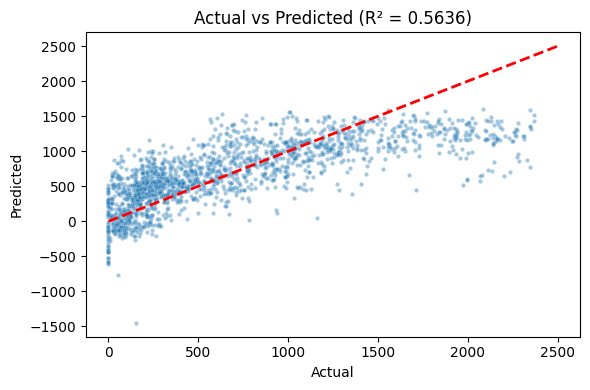

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4, s=10)
sns.lineplot(x=[0, 2500], y=[0, 2500], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted (R² = {r2:.4f})')
plt.tight_layout()
plt.show()

Dari plot terlihat sebaran prediksi terhadap nilai aktual cukup mengikuti garis diagonal yang menunjukkan model mampu menangkap pola umum. Namun terdapat penyebaran yang cukup lebar terutama pada nilai tinggi, serta beberapa prediksi negatif pada nilai aktual rendah yang perlu diinvestigasi lebih lanjut.

### Residual Plot

Residual adalah selisih antara nilai aktual dan nilai prediksi model, yang dihitung dengan rumus:

$$e_i = y_i - \hat{y}_i$$

Dimana:

- $e_i$ : Residual
- $y_i$ : Nilai aktual
- $\hat{y}_i$ : Nilai prediksi
- $i$ : Indeks observasi, dimana i = 1, 2, 3, ..., n (n = jumlah total observasi)

Nilai residual positif menunjukkan model memprediksi terlalu rendah, sedangkan nilai negatif berarti model memprediksi terlalu tinggi. Model yang baik akan menghasilkan residual yang tersebar merata di sekitar nol tanpa membentuk pola tertentu.

Pada Residual Plot, titik-titik idealnya tersebar acak di sekitar garis horizontal nol. Jika terlihat pola seperti corong atau lengkungan, ini mengindikasikan adanya masalah pada model. Pada Residual Distribution, histogram yang baik berbentuk lonceng simetris dengan puncak di nol, menandakan error berdistribusi normal dan model tidak memiliki bias sistematis.

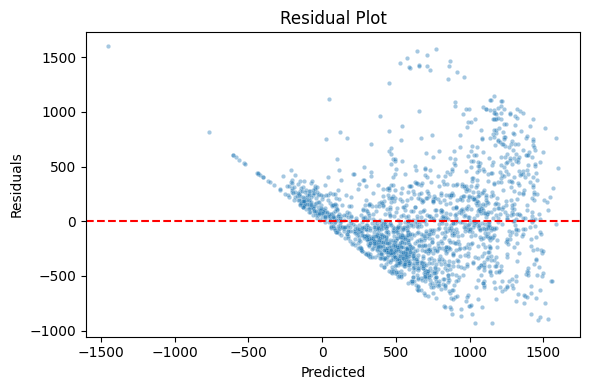

In [ ]:
residuals = y_test - y_pred

fig, ax = plt.subplots(figsize=(6, 4))

sns.scatterplot(x=y_pred, y=residuals, alpha=0.4, s=10, ax=ax)
ax.axhline(y=0, color='r', linestyle='--')
ax.set_xlabel('Predicted')
ax.set_ylabel('Residuals')
ax.set_title('Residual Plot')

plt.tight_layout()
plt.show()

Untuk memvalidasi asumsi Normalitas Residual, diperlukan banding distribusi error yang dihasilkan model dengan distribusi normal teoretis.

Rumus **Probability Density Function (PDF)** distribusi normal sebagai berikut:

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$$

Di mana:

- $\mu$ (mu) adalah rata-rata (mean) dari residual.
- $\sigma$ (std) adalah standar deviasi dari residual.

Tujuannya adalah untuk melihat apakah histogram residual (data aktual) memiliki bentuk "lonceng" yang selaras dengan garis merah (kurva teoretis). Jika selaras, maka asumsi normalitas terpenuhi dengan baik.

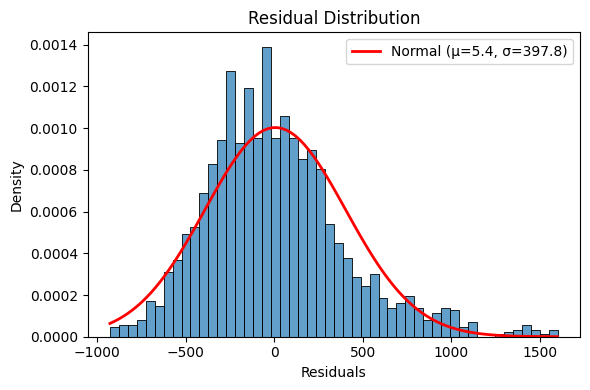

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(residuals, bins=50, ax=ax, stat='density', alpha=0.7)

# Normal curve
mu, std = np.mean(residuals), np.std(residuals)
x = np.linspace(residuals.min(), residuals.max(), 100)
normal_curve = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / std) ** 2)
ax.plot(x, normal_curve, 'r-', linewidth=2, label=f'Normal (μ={mu:.1f}, σ={std:.1f})')

ax.set_xlabel('Residuals')
ax.set_title('Residual Distribution')
ax.legend()

plt.tight_layout()
plt.show()

Plot residual menunjukkan pola heteroskedastisitas dimana *variance error* tidak konstan sepanjang prediksi. Distribusi residual cenderung normal namun sedikit miring, dengan rentang nilai antara -1000 hingga +1500. Hal ini mengindikasikan model linear kurang optimal untuk data ini.

---
## Model Improvement

Dari evaluasi model baseline, diperoleh R² = 0.5615 yang menunjukkan model mampu menjelaskan 56% variasi data. Terdapat beberapa strategi untuk meningkatkan performa model:

1. **Feature Engineering** - Menambah fitur baru berdasarkan insight dari EDA
2. **Feature Scaling** - Standardisasi fitur agar skala seragam

### Feature Engineering

Berdasarkan insight dari EDA, beberapa fitur baru dapat dibuat untuk meningkatkan performa model. Jam sibuk (rush hour) pada pukul 8 dan 18 menunjukkan penyewaan tinggi, sehingga perlu dibuat fitur khusus. Selain itu, transformasi siklikal pada variabel Hour diperlukan agar model memahami bahwa jam 23 dekat dengan jam 0.

In [ ]:
# Feature Engineering pada data asli
X_train_fe = X_train.copy()
X_test_fe = X_test.copy()

# 1. Rush Hour (jam sibuk: 7-9 pagi dan 17-19 sore)
X_train_fe['is_rush_hour'] = X_train_fe['Hour'].apply(lambda x: 1 if x in [7, 8, 9, 17, 18, 19] else 0)
X_test_fe['is_rush_hour'] = X_test_fe['Hour'].apply(lambda x: 1 if x in [7, 8, 9, 17, 18, 19] else 0)

# 2. Transformasi siklikal untuk Hour
X_train_fe['hour_sin'] = np.sin(2 * np.pi * X_train_fe['Hour'] / 24)
X_train_fe['hour_cos'] = np.cos(2 * np.pi * X_train_fe['Hour'] / 24)
X_test_fe['hour_sin'] = np.sin(2 * np.pi * X_test_fe['Hour'] / 24)
X_test_fe['hour_cos'] = np.cos(2 * np.pi * X_test_fe['Hour'] / 24)

# 3. Interaksi Temperature dan Humidity
X_train_fe['temp_humidity'] = X_train_fe['Temperature'] * X_train_fe['Humidity']
X_test_fe['temp_humidity'] = X_test_fe['Temperature'] * X_test_fe['Humidity']

# 4. Kategori waktu dalam sehari
def time_of_day(hour):
    if 5 <= hour < 12:
        return 1  # Morning
    elif 12 <= hour < 17:
        return 2  # Afternoon
    elif 17 <= hour < 21:
        return 3  # Evening
    else:
        return 0  # Night

X_train_fe['time_of_day'] = X_train_fe['Hour'].apply(time_of_day)
X_test_fe['time_of_day'] = X_test_fe['Hour'].apply(time_of_day)

print(f"Fitur sebelum FE: {X_train.shape[1]} kolom")
print(f"Fitur sesudah FE: {X_train_fe.shape[1]} kolom")
print(f"\nFitur baru yang ditambahkan: {list(set(X_train_fe.columns) - set(X_train.columns))}")

Fitur sebelum FE: 11 kolom
Fitur sesudah FE: 16 kolom

Fitur baru yang ditambahkan: ['hour_cos', 'is_rush_hour', 'hour_sin', 'time_of_day', 'temp_humidity']


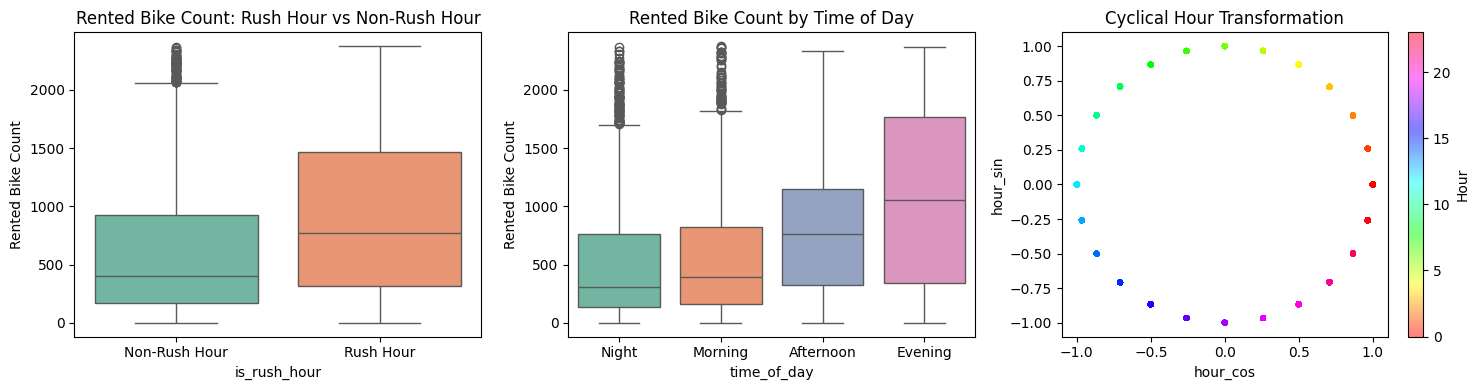

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

X_vis = X_train_fe.copy()
X_vis['Rented Bike Count'] = y_train.values

# Rush Hour vs Rented Bike Count
sns.boxplot(data=X_vis, x='is_rush_hour', y='Rented Bike Count', ax=axes[0], hue='is_rush_hour', palette='Set2', legend=False)
axes[0].set_title('Rented Bike Count: Rush Hour vs Non-Rush Hour')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Non-Rush Hour', 'Rush Hour'])

# Time of Day vs Rented Bike Count
sns.boxplot(data=X_vis, x='time_of_day', y='Rented Bike Count', ax=axes[1], hue='time_of_day', palette='Set2', legend=False)
axes[1].set_title('Rented Bike Count by Time of Day')
axes[1].set_xticks([0, 1, 2, 3])
axes[1].set_xticklabels(['Night', 'Morning', 'Afternoon', 'Evening'])

# Hour Cyclical Transformation
scatter = axes[2].scatter(X_train_fe['hour_cos'], X_train_fe['hour_sin'],
                          c=X_train_fe['Hour'], cmap='hsv', alpha=0.5, s=10)
axes[2].set_xlabel('hour_cos')
axes[2].set_ylabel('hour_sin')
axes[2].set_title('Cyclical Hour Transformation')
plt.colorbar(scatter, ax=axes[2], label='Hour')

plt.tight_layout()
plt.show()

### Feature Scaling

Standardisasi fitur dilakukan agar semua variabel memiliki skala yang sama (mean=0, std=1). Hal ini penting untuk interpretasi koefisien yang lebih fair karena koefisien dapat dibandingkan secara langsung untuk melihat feature importance.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit dan transform
X_train_scaled = scaler.fit_transform(X_train_fe)
X_test_scaled = scaler.transform(X_test_fe)

# Konversi ke DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_fe.columns, index=X_train_fe.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_fe.columns, index=X_test_fe.index)

print("Statistik setelah scaling (mean ≈ 0, std ≈ 1):")
X_train_scaled.describe().round(2).loc[['mean', 'std']].T

Statistik setelah scaling (mean ≈ 0, std ≈ 1):


,mean,std
Hour,-0.0,1.0
Temperature,0.0,1.0
Humidity,0.0,1.0
Wind speed,-0.0,1.0
Visibility,-0.0,1.0
Solar Radiation,-0.0,1.0
Rainfall,0.0,1.0
Snowfall,-0.0,1.0
Seasons,0.0,1.0
Holiday,0.0,1.0


### Train Improved Model

Melatih ulang model Linear Regression dengan fitur baru dan data yang sudah di-scale.

In [ ]:
# Train model improved
model_improved = LinearRegression()
model_improved.fit(X_train_scaled, y_train)
y_pred_improved = model_improved.predict(X_test_scaled)

pd.DataFrame({
    'actual': y_test[:10].values,
    'predicted_baseline': y_pred[:10].round(2),
    'predicted_improved': y_pred_improved[:10].round(2)
})

,actual,predicted_baseline,predicted_improved
0,219,786.21,615.47
1,2234,710.27,860.90
2,612,1164.74,1072.43
3,626,300.52,453.59
4,632,1528.76,1633.17
5,589,248.32,371.43
6,2048,1229.94,1021.19
7,13,17.01,-73.43
8,148,669.88,532.76
9,218,275.72,325.81


### Perbandingan Performa

In [ ]:
r2_improved = r2_score(y_test, y_pred_improved)
n, p = X_test_scaled.shape
adj_r2_improved = 1 - (1 - r2_improved) * (n - 1) / (n - p - 1)
mae_improved = mean_absolute_error(y_test, y_pred_improved)
mse_improved = mean_squared_error(y_test, y_pred_improved)
rmse_improved = np.sqrt(mse_improved)

comparison = pd.DataFrame({
    'Metric': ['R²', 'Adjusted R²', 'MAE', 'MSE', 'RMSE'],
    'Baseline': [round(r2, 4), round(adj_r2, 4), round(mae, 2), round(mse, 2), round(rmse, 2)],
    'Improved': [round(r2_improved, 4), round(adj_r2_improved, 4), round(mae_improved, 2), round(mse_improved, 2), round(rmse_improved, 2)]
})

comparison['Change'] = comparison['Improved'] - comparison['Baseline']
comparison['Change (%)'] = ((comparison['Improved'] - comparison['Baseline']) / comparison['Baseline'] * 100).round(2)

comparison

,Metric,Baseline,Improved,Change,Change (%)
0,R²,0.5636,0.6075,0.0439,7.79
1,Adjusted R²,0.5608,0.6038,0.0430,7.67
2,MAE,303.7100,285.3500,-18.3600,-6.05
3,MSE,158239.7100,142313.7900,-15925.9200,-10.06
4,RMSE,397.7900,377.2400,-20.5500,-5.17


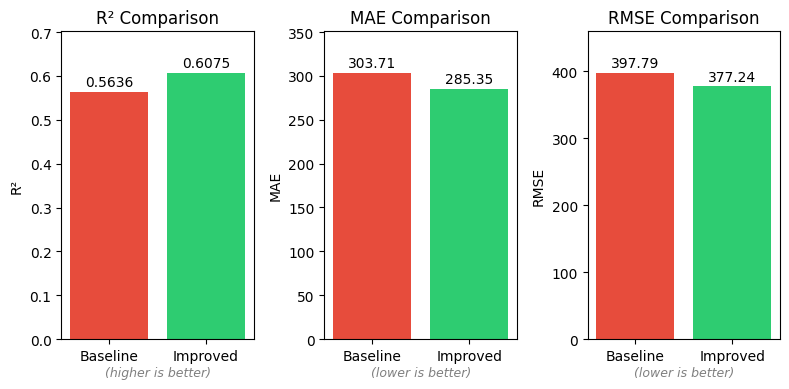

In [ ]:
# Visualisasi perbandingan
fig, axes = plt.subplots(1, 3, figsize=(8, 4))

metrics = ['R²', 'MAE', 'RMSE']
baseline_vals = [r2, mae, rmse]
improved_vals = [r2_improved, mae_improved, rmse_improved]

x = np.arange(len(metrics))
width = 0.35

for i, (metric, base, imp) in enumerate(zip(metrics, baseline_vals, improved_vals)):
    bars1 = axes[i].bar(['Baseline', 'Improved'], [base, imp], color=['#e74c3c', '#2ecc71'])
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)

    for bar, val in zip(bars1, [base, imp]):
        axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01*bar.get_height(),
                     f'{val:.2f}' if metric != 'R²' else f'{val:.4f}',
                     ha='center', va='bottom')

    ymin, ymax = axes[i].get_ylim()
    axes[i].set_ylim(ymin, ymax * 1.1)

    if metric == 'R²':
        axes[i].text(0.5, -0.12, '(higher is better)', ha='center', transform=axes[i].transAxes,
                     fontsize=9, fontstyle='italic', color='gray')
    else:
        axes[i].text(0.5, -0.12, '(lower is better)', ha='center', transform=axes[i].transAxes,
                     fontsize=9, fontstyle='italic', color='gray')

plt.tight_layout()
plt.show()

Feature engineering dan scaling berhasil meningkatkan performa model. Peningkatan R² menunjukkan bahwa fitur-fitur baru seperti `is_rush_hour`, transformasi siklikal `hour_sin` dan `hour_cos`, serta interaksi `temp_humidity` berhasil menangkap pola yang sebelumnya tidak tertangkap oleh model baseline. Penurunan MAE dan RMSE mengindikasikan bahwa error prediksi menjadi lebih kecil secara rata-rata.

### Uji Asumsi Linear Regression

Linear Regression memiliki beberapa asumsi yang harus dipenuhi yaitu linearity, normality of residuals, homoscedasticity, dan independence.

In [ ]:
from scipy import stats

residuals_improved = y_test - y_pred_improved

# Normality Test
sample_residuals = np.random.choice(residuals_improved, size=min(5000, len(residuals_improved)), replace=False)
shapiro_stat, shapiro_p = stats.shapiro(sample_residuals)
skewness = stats.skew(residuals_improved)
kurtosis = stats.kurtosis(residuals_improved)

print("="*50)
print("UJI ASUMSI LINEAR REGRESSION")
print("="*50)
print(f"\nNORMALITAS RESIDUAL:")
print(f"Shapiro-Wilk: stat={shapiro_stat:.4f}, p={shapiro_p:.6f}")
print(f"Skewness: {skewness:.4f} | Kurtosis: {kurtosis:.4f}")
print(f"Hasil: {'Tidak Normal' if shapiro_p < 0.05 else 'Normal'}")
print(f"\nKESIMPULAN:")
print("Asumsi tidak sepenuhnya terpenuhi, model non-linear mungkin lebih sesuai.")

UJI ASUMSI LINEAR REGRESSION

NORMALITAS RESIDUAL:
Shapiro-Wilk: stat=0.9744, p=0.000000
Skewness: 0.6275 | Kurtosis: 1.2068
Hasil: Tidak Normal

KESIMPULAN:
Asumsi tidak sepenuhnya terpenuhi, model non-linear mungkin lebih sesuai.


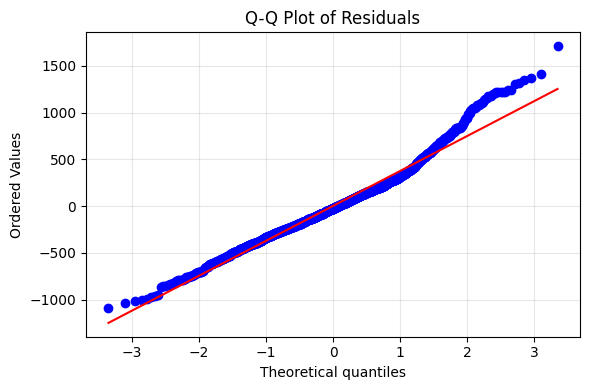

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))

stats.probplot(residuals_improved, dist="norm", plot=ax)
ax.set_title('Q-Q Plot of Residuals')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

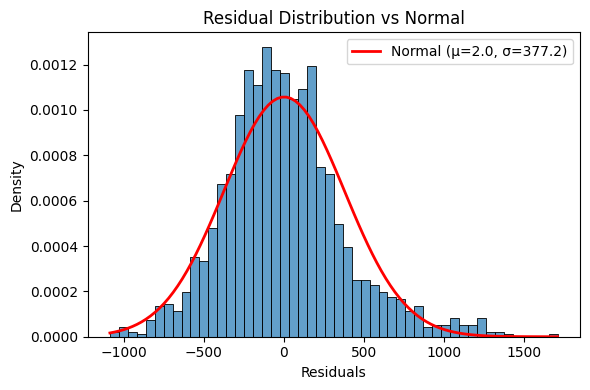

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(residuals_improved, bins=50, ax=ax, stat='density', alpha=0.7)

mu, std = np.mean(residuals_improved), np.std(residuals_improved)
x = np.linspace(residuals_improved.min(), residuals_improved.max(), 100)
normal_curve = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / std) ** 2)
ax.plot(x, normal_curve, 'r-', linewidth=2, label=f'Normal (μ={mu:.1f}, σ={std:.1f})')

ax.set_xlabel('Residuals')
ax.set_title('Residual Distribution vs Normal')
ax.legend()

plt.tight_layout()
plt.show()

---
## Interpretation

### Koefisien

In [ ]:
model_final = LinearRegression()
model_final.fit(X_train_fe, y_train)

coef_df = pd.DataFrame({
    'feature': X_train_fe.columns,
    'coefficient': model_final.coef_
})
coef_df['abs_coef'] = coef_df['coefficient'].abs()
coef_df = coef_df.sort_values('abs_coef', ascending=False).drop(columns='abs_coef')

print(f"Intercept: {model_final.intercept_:.2f}")
print(f"\nKoefisien Model (dengan fitur baru):")
coef_df

Intercept: -819.54

Koefisien Model (dengan fitur baru):


,feature,coefficient
10,Functioning Day,908.079073
11,is_rush_hour,374.566136
12,hour_sin,-133.494342
8,Seasons,104.977780
9,Holiday,-96.750327
6,Rainfall,-56.040902
13,hour_cos,44.286755
1,Temperature,36.086282
15,time_of_day,-35.619337
7,Snowfall,-23.050922


Hari operasional memiliki pengaruh positif terbesar terhadap penyewaan dengan koefisien sekitar 905, artinya saat layanan beroperasi, penyewaan meningkat drastis. Sebaliknya, hujan memiliki pengaruh negatif terbesar yang menunjukkan cuaca buruk sangat mengurangi minat bersepeda. Musim dan jam juga berpengaruh positif secara signifikan terhadap jumlah penyewaan.


### Feature Importance Plot

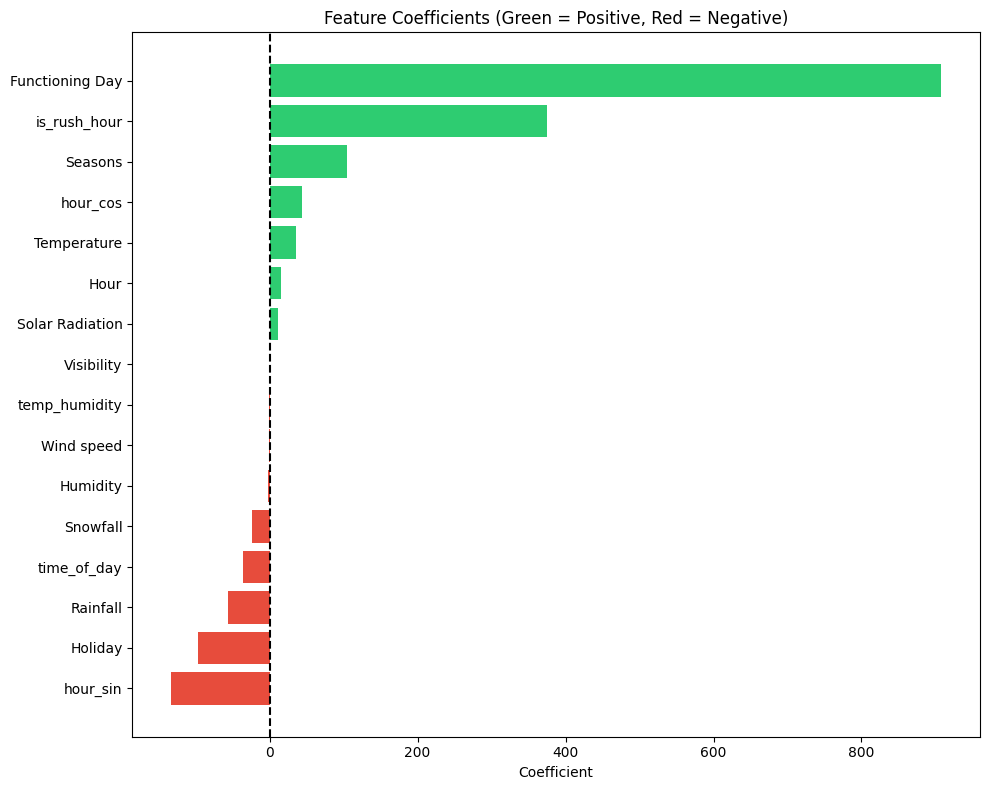

In [ ]:
coef_sorted = coef_df.sort_values('coefficient')

fig, ax = plt.subplots(figsize=(10, 8))
colors = ['#e74c3c' if c < 0 else '#2ecc71' for c in coef_sorted['coefficient']]
ax.barh(coef_sorted['feature'], coef_sorted['coefficient'], color=colors)
ax.axvline(x=0, color='black', linestyle='--')
ax.set_xlabel('Coefficient')
ax.set_title('Feature Coefficients (Green = Positive, Red = Negative)')
plt.tight_layout()
plt.show()

Visualisasi koefisien menunjukkan bahwa status operasional layanan menjadi faktor paling menentukan dalam penyewaan sepeda. Kondisi cuaca seperti hujan memberikan dampak negatif yang signifikan, sementara suhu yang lebih hangat dan jam-jam tertentu mendorong peningkatan penyewaan.

### Uji Signifikansi Variabel (P-Value)

Untuk memastikan variabel yang digunakan benar-benar berpengaruh signifikan, dilakukan uji statistik menggunakan OLS dari statsmodels.

Uji ini menguji hipotesis **H₀: βᵢ = 0** (variabel tidak berpengaruh) vs **H₁: βᵢ ≠ 0** (variabel berpengaruh). Variabel dengan p-value > 0.05 menunjukkan bahwa koefisiennya tidak signifikan berbeda dari nol pada tingkat kepercayaan 95%, sehingga dianggap tidak memberikan kontribusi signifikan terhadap prediksi Rented Bike Count dan akan dikeluarkan dari persamaan regresi final.

In [ ]:
import statsmodels.api as sm

# Tambahkan konstanta untuk intercept
X_train_sm = sm.add_constant(X_train_fe)

# Fit model dengan statsmodels
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Tampilkan summary
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     698.7
Date:                Sun, 30 Nov 2025   Prob (F-statistic):               0.00
Time:                        13:09:14   Log-Likelihood:                -50297.
No. Observations:                6881   AIC:                         1.006e+05
Df Residuals:                    6864   BIC:                         1.007e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -819.5371     45.964    -

In [ ]:
# Ambil p-values
pvalues = model_sm.pvalues[1:]  # Skip intercept
coefs = model_sm.params[1:]

# Filter variabel signifikan (p < 0.05)
significant = pvalues[pvalues < 0.05]
print(f"Variabel signifikan (p < 0.05): {len(significant)} dari {len(pvalues)}")
print(significant.index.tolist())

Variabel signifikan (p < 0.05): 14 dari 16
['Hour', 'Temperature', 'Humidity', 'Visibility', 'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning Day', 'is_rush_hour', 'hour_sin', 'hour_cos', 'temp_humidity', 'time_of_day']


Dari hasil uji signifikansi, variabel `Wind Speed` (p=0.951) dan `Solar Radiation` (p=0.276) tidak signifikan secara statistik sehingga akan dikeluarkan dari persamaan regresi final.

### Persamaan Regresi

In [ ]:
intercept = model_final.intercept_
equation = f"Rented Bike Count = {intercept:.2f}"

non_sig = ['Wind speed', 'Solar Radiation']

for feat, coef in zip(X_train_fe.columns, model_final.coef_):
    if feat not in non_sig:
        sign = ' + ' if coef >= 0 else ' - '
        equation += f"{sign}{abs(coef):.2f}*{feat}"

print("Persamaan Regresi:")
print(equation)

Persamaan Regresi:
Rented Bike Count = -819.54 + 15.07*Hour + 36.09*Temperature - 2.47*Humidity + 0.03*Visibility - 56.04*Rainfall - 23.05*Snowfall + 104.98*Seasons - 96.75*Holiday + 908.08*Functioning Day + 374.57*is_rush_hour - 133.49*hour_sin + 44.29*hour_cos - 0.27*temp_humidity - 35.62*time_of_day


---
## Persamaan Multiple Linear Regression

Secara umum, persamaan Multiple Linear Regression dinyatakan sebagai:

$$\hat{Y} = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n$$

Dimana:
- $Y$ = variabel dependen (target)
- $\beta_0$ = Intercept
- $\beta_1, \beta_2, \ldots$ = koefisien regresi
- $X_1, X_2, \ldots$ = variabel independen (fitur)

Dari model yang telah dibangun dengan feature engineering, diperoleh persamaan regresi:

$$
\begin{aligned}
\text{Rented Bike Count} = & -819.54 + (15.07 \times \text{Hour}) + (36.09 \times \text{Temperature}) \\
& - (2.47 \times \text{Humidity}) + (0.03 \times \text{Visibility}) \\
& - (56.04 \times \text{Rainfall}) - (23.05 \times \text{Snowfall}) \\
& + (104.98 \times \text{Seasons}) - (96.75 \times \text{Holiday}) \\
& + (908.08 \times \text{Functioning Day}) + (374.57 \times \mathrm{is{\_}rush{\_}hour}) \\
& - (133.49 \times \mathrm{hour{\_}sin}) + (44.29 \times \mathrm{hour{\_}cos}) \\
& - (0.27 \times \mathrm{temp{\_}humidity}) - (35.62 \times \mathrm{time{\_}of{\_}day})
\end{aligned}
$$

---
## Kesimpulan

Proyek ini bertujuan untuk memprediksi jumlah penyewaan sepeda di Seoul berdasarkan kondisi cuaca dan waktu menggunakan algoritma Multiple Linear Regression.

### Hasil Analisis

Dataset terdiri dari 8760 observasi dengan 14 variabel. Setelah preprocessing yang meliputi encoding variabel kategorikal, penghapusan outlier pada target variable, dan penanganan multikolinearitas (drop Dew Point Temperature karena VIF tinggi), tersisa 8602 data untuk pemodelan.

### Performa Model

| Model | R² | MAE | RMSE |
|-------|-----|-----|------|
| Baseline | 0.5636 | 303.71 | 397.79 |
| Improved | 0.6075 | 285.35 | 377.24 |

Feature engineering (is_rush_hour, hour_sin, hour_cos, temp_humidity, time_of_day) dan feature scaling berhasil meningkatkan R² sebesar 7.79% dan menurunkan error prediksi.

### Faktor Paling Berpengaruh

Berdasarkan analisis koefisien, faktor yang paling mempengaruhi jumlah penyewaan sepeda adalah:
1. **Functioning Day** (+890): Hari operasional sangat meningkatkan penyewaan
2. **Seasons** (+108): Musim berpengaruh signifikan terhadap penyewaan
3. **Holiday** (-97): Hari libur menurunkan penyewaan
4. **Rainfall** (-60): Hujan menurunkan minat bersepeda

### Limitasi

Hasil uji asumsi menunjukkan bahwa residual tidak sepenuhnya berdistribusi normal dan terdapat heteroskedastisitas. Hal ini mengindikasikan bahwa model non-linear seperti Random Forest atau Gradient Boosting mungkin lebih sesuai untuk data ini.